In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import preprocessing as prep

data = pd.read_excel(r'E:\5th sem\ML\lab\19CSE305_LabData_Set21.xlsx', sheet_name = 'thyroid0387_UCI')
# finding the datatypes of each attribute
print(data.dtypes)

Record ID                     int64
age                           int64
sex                          object
on thyroxine                 object
query on thyroxine           object
on antithyroid medication    object
sick                         object
pregnant                     object
thyroid surgery              object
I131 treatment               object
query hypothyroid            object
query hyperthyroid           object
lithium                      object
goitre                       object
tumor                        object
hypopituitary                object
psych                        object
TSH measured                 object
TSH                          object
T3 measured                  object
T3                           object
TT4 measured                 object
TT4                          object
T4U measured                 object
T4U                          object
FTI measured                 object
FTI                          object
TBG measured                

In [7]:
data.replace('?', np.NaN, inplace=True)
data

,Record ID,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,Condition
0,840801013,29,F,f,f,f,f,f,f,f,...,f,NaN,f,NaN,f,NaN,f,NaN,other,NO CONDITION
1,840801014,29,F,f,f,f,f,f,f,f,...,t,128.0,f,NaN,f,NaN,f,NaN,other,NO CONDITION
2,840801042,41,F,f,f,f,f,f,f,f,...,f,NaN,f,NaN,f,NaN,t,11.0,other,NO CONDITION
3,840803046,36,F,f,f,f,f,f,f,f,...,f,NaN,f,NaN,f,NaN,t,26.0,other,NO CONDITION
4,840803047,32,F,f,f,f,f,f,f,f,...,f,NaN,f,NaN,f,NaN,t,36.0,other,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,841031002,41,F,f,f,f,f,f,f,f,...,t,148.0,t,1.44,t,103.0,f,NaN,STMW,NO CONDITION
996,841031010,41,F,f,f,f,f,f,f,f,...,t,9.7,t,1.46,t,6.6,f,NaN,other,F
997,841031030,20,F,f,f,f,f,t,f,f,...,f,NaN,f,NaN,f,NaN,t,30.0,other,NO CONDITION
998,841031031,20,F,f,f,f,f,f,f,f,...,t,201.0,t,0.84,t,240.0,f,NaN,SVI,AK


In [3]:
data.isnull().sum()

Record ID                      0
age                            0
sex                           24
on thyroxine                   0
query on thyroxine             0
on antithyroid medication      0
sick                           0
pregnant                       0
thyroid surgery                0
I131 treatment                 0
query hypothyroid              0
query hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH measured                   0
TSH                          115
T3 measured                    0
T3                           202
TT4 measured                   0
TT4                           40
T4U measured                   0
T4U                           98
FTI measured                   0
FTI                           98
TBG measured                   0
TBG                          964
referral source                0
Condition 

In [4]:
label_encoding_columns = ['referral source', 'Condition']
one_hot_encoding_columns = ['sex', 'on thyroxine', 'query on thyroxine', 'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery', 'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'T3 measured', 'TT4 measured', 'T4U measured', 'FTI measured', 'TBG measured']

In [5]:
# entering the missing values with mode, median and mean
mode_columns = label_encoding_columns + one_hot_encoding_columns
for i in mode_columns:
    data[i] = data[i].fillna(data[i].mode()[0])

median_columns = ['TSH', 'T3', 'TT4', 'TT4', 'T4U', 'FTI', 'TBG']
for i in median_columns:
    data[i] = data[i].fillna(data[i].median())

data

NameError: name 'label_encoding_columns' is not defined

In [6]:
# label encoding schema
from sklearn import preprocessing as prepro
label_encoder = prepro.LabelEncoder()
for i in label_encoding_columns:
    data[i] = label_encoder.fit_transform(data[i])

# One hot encoding schema
data = pd.get_dummies(data, columns = one_hot_encoding_columns)
data

,Record ID,age,TSH,T3,TT4,T4U,FTI,TBG,referral source,Condition,...,T3 measured_f,T3 measured_t,TT4 measured_f,TT4 measured_t,T4U measured_f,T4U measured_t,FTI measured_f,FTI measured_t,TBG measured_f,TBG measured_t
0,840801013,29,0.3,1.8,103.0,0.96,106.0,25.5,5,18,...,1,0,1,0,1,0,1,0,1,0
1,840801014,29,1.6,1.9,128.0,0.96,106.0,25.5,5,18,...,0,1,0,1,1,0,1,0,1,0
2,840801042,41,0.8,1.8,103.0,0.96,106.0,11.0,5,18,...,1,0,1,0,1,0,1,0,0,1
3,840803046,36,0.8,1.8,103.0,0.96,106.0,26.0,5,18,...,1,0,1,0,1,0,1,0,0,1
4,840803047,32,0.8,1.8,103.0,0.96,106.0,36.0,5,23,...,1,0,1,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,841031002,41,0.1,2.1,148.0,1.44,103.0,25.5,0,18,...,0,1,0,1,0,1,0,1,1,0
996,841031010,41,53.0,0.4,9.7,1.46,6.6,25.5,5,4,...,0,1,0,1,0,1,0,1,1,0
997,841031030,20,0.8,1.8,103.0,0.96,106.0,30.0,5,18,...,1,0,1,0,1,0,1,0,0,1
998,841031031,20,0.1,0.8,201.0,0.84,240.0,25.5,3,1,...,0,1,0,1,0,1,0,1,1,0


In [7]:
# finding the mean, variance of numeric variables
import statistics as st

TSH_values = data['TSH']
mean_TSH = np.nanmean(TSH_values)
print("The mean value of TSH readings is: ", mean_TSH, "\n")
variance_TSH = np.nanvar(TSH_values)
print("The variance value of TSH readings is: ", variance_TSH, "\n")

T3_values = data['T3']
mean_T3 = np.nanmean(T3_values)
print("The mean value of T3 readings is: ", mean_T3, "\n")
variance_T3 = np.nanvar(T3_values)
print("The variance value of T3 readings is: ", variance_T3, "\n")

TT4_values = data['TT4']
mean_TT4 = np.nanmean(TT4_values)
print("The mean value of TT4 readings is: ", mean_TT4, "\n")
variance_TT4 = np.nanvar(TT4_values)
print("The variance value of TT4 readings is: ", variance_TT4, "\n")

T4U_values = data['T4U']
mean_T4U = np.nanmean(T4U_values)
print("The mean value of T4U readings is: ", mean_T4U, "\n")
variance_T4U = np.nanvar(T4U_values)
print("The variance value of T4U readings is: ", variance_T4U, "\n")

FTI_values = data['FTI']
mean_FTI = np.nanmean(FTI_values)
print("The mean value of FTI readings is: ", mean_FTI, "\n")
variance_FTI = np.nanvar(FTI_values)
print("The variance value of FTI readings is: ", variance_FTI, "\n")

TBG_values = data['TBG']
mean_TBG = np.nanmean(TBG_values)
print("The mean value of TBG readings is: ", mean_TBG, "\n")
variance_TBG = np.nanvar(TSH_values)
print("The variance value of TBG readings is: ", variance_TBG, "\n")

The mean value of TSH readings is:  5.8972799909999996 

The variance value of TSH readings is:  768.342224901751 

The mean value of T3 readings is:  1.8177499990000001 

The variance value of T3 readings is:  0.518337423935501 

The mean value of TT4 readings is:  106.30980000000001 

The variance value of TT4 readings is:  1668.28154396 

The mean value of T4U readings is:  0.9708600000000002 

The variance value of T4U readings is:  0.038606860400000005 

The mean value of FTI readings is:  113.758 

The variance value of FTI readings is:  3460.382556 

The mean value of TBG readings is:  25.526299999 

The variance value of TBG readings is:  768.342224901751 



Text(0.5, -0.15, 'TSH values and studying their outliers')

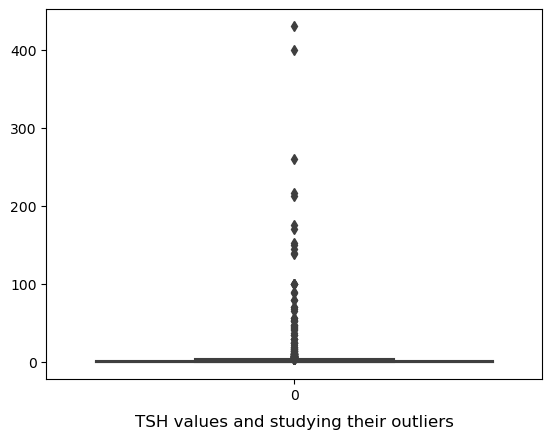

In [8]:
# Studying the presence of outliers
sns.boxplot(data['TSH'])
plt.title("TSH values and studying their outliers", y = -0.15)

Text(0.5, -0.15, 'T3 values and studying their outliers')

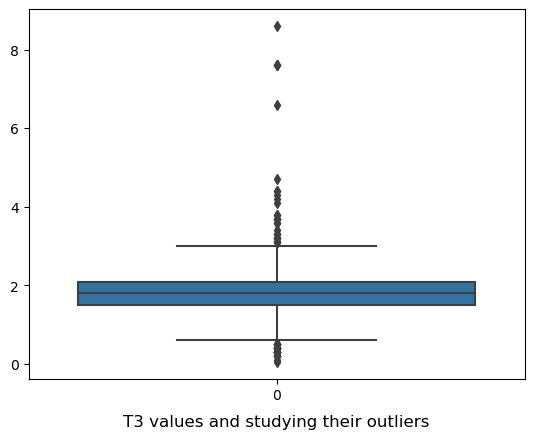

In [9]:
sns.boxplot(data['T3'])
plt.title("T3 values and studying their outliers", y = -0.15)

Text(0.5, -0.15, 'TT4 values and studying their outliers')

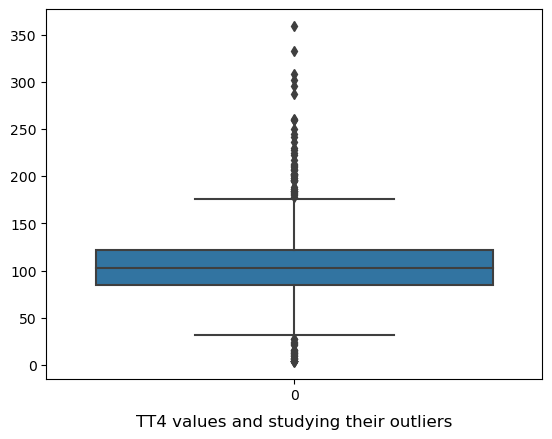

In [10]:
sns.boxplot(data['TT4'])
plt.title("TT4 values and studying their outliers", y = -0.15)

Text(0.5, -0.15, 'T4U values and studying their outliers')

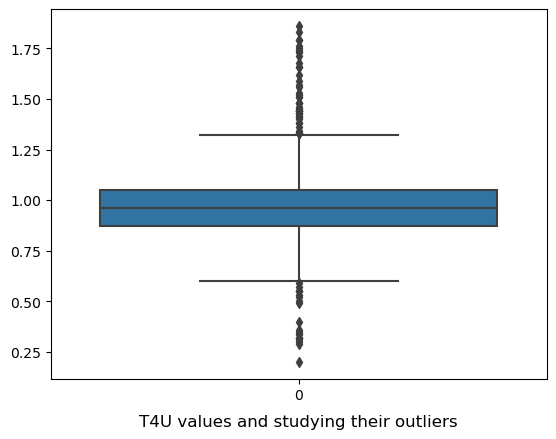

In [11]:
sns.boxplot(data['T4U'])
plt.title("T4U values and studying their outliers", y = -0.15)

Text(0.5, -0.15, 'FTI values and studying their outliers')

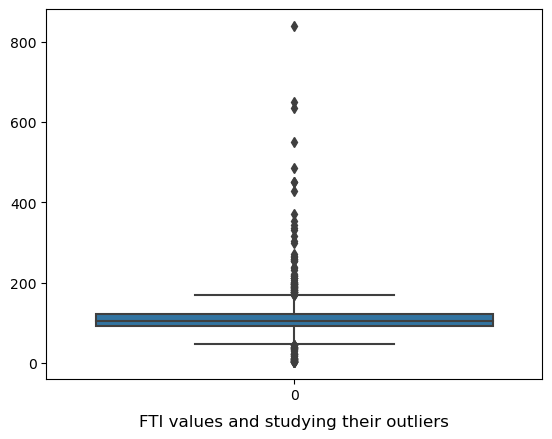

In [12]:
sns.boxplot(data['FTI'])
plt.title("FTI values and studying their outliers", y = -0.15)

Text(0.5, -0.15, 'TBG values and studying their outliers')

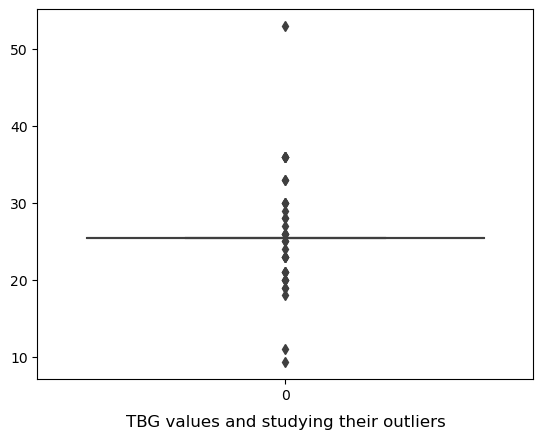

In [13]:
sns.boxplot(data['TBG'])
plt.title("TBG values and studying their outliers", y = -0.15)

In [14]:
# Normalizing all the attributes
scaler = prep.MinMaxScaler()
scaled_columns = ['TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']
data_copy = data
scaled_df = scaler.fit_transform(data_copy[scaled_columns])
scaled_df = pd.DataFrame(scaled_df, columns = scaled_columns)
for i in scaled_columns:
    data[i] = scaled_df[i]
data

,Record ID,age,TSH,T3,TT4,T4U,FTI,TBG,referral source,Condition,...,T3 measured_f,T3 measured_t,TT4 measured_f,TT4 measured_t,T4U measured_f,T4U measured_t,FTI measured_f,FTI measured_t,TBG measured_f,TBG measured_t
0,840801013,29,0.000581,0.204678,0.280899,0.457831,0.123730,0.370709,5,18,...,1,0,1,0,1,0,1,0,1,0
1,840801014,29,0.003605,0.216374,0.351124,0.457831,0.123730,0.370709,5,18,...,0,1,0,1,1,0,1,0,1,0
2,840801042,41,0.001744,0.204678,0.280899,0.457831,0.123730,0.038902,5,18,...,1,0,1,0,1,0,1,0,0,1
3,840803046,36,0.001744,0.204678,0.280899,0.457831,0.123730,0.382151,5,18,...,1,0,1,0,1,0,1,0,0,1
4,840803047,32,0.001744,0.204678,0.280899,0.457831,0.123730,0.610984,5,23,...,1,0,1,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,841031002,41,0.000116,0.239766,0.407303,0.746988,0.120143,0.370709,0,18,...,0,1,0,1,0,1,0,1,1,0
996,841031010,41,0.123154,0.040936,0.018820,0.759036,0.004901,0.370709,5,4,...,0,1,0,1,0,1,0,1,1,0
997,841031030,20,0.001744,0.204678,0.280899,0.457831,0.123730,0.473684,5,18,...,1,0,1,0,1,0,1,0,0,1
998,841031031,20,0.000116,0.087719,0.556180,0.385542,0.283921,0.370709,3,1,...,0,1,0,1,0,1,0,1,1,0


In [15]:
# Checking for similarity between first two vectors
# Simple matching coefficient
observation_1 = data.iloc[0, 2:]
observation_2 = data.iloc[1, 2:]
def similarity_matching(observation_1, observation_2):
    count_num_smc = 0
    count_den_smc = 0
    for i in range(len(observation_1)):
        if observation_1[i] == observation_2[i]:
            count_num_smc += 1
            count_den_smc += 1
        else:
            count_den_smc += 1
    smc = count_num_smc / count_den_smc
    return smc
print("The Simple matching coefficient (SMC) between two observation vectors is: ", similarity_matching(observation_1, observation_2), "\n")

# Jaccard coefficient
def jaccard_similarity(observation_1, observation_2):
    count_num_jc = 0
    count_den_jc = 0
    for i in range(len(observation_1)):
        if observation_1[i] == observation_2[i] and observation_1[i] == 1:
            count_num_jc += 1
            count_den_jc += 1
        elif observation_1[i] != observation_2[i]:
            count_den_jc += 1
    jc = count_num_jc / count_den_jc
    return jc
print("The Jaccard coefficient (JC) between two observation vectors is: ", jaccard_similarity(observation_1, observation_2), "\n")

The Simple matching coefficient (SMC) between two observation vectors is:  0.8163265306122449 

The Jaccard coefficient (JC) between two observation vectors is:  0.6666666666666666 



In [16]:
# Cosine similarity measure
import math as mat
def cosine_similarity(observation_1, observation_2):
    observation_dot_product = 0
    for i in range(len(observation_1)):
        observation_dot_product += observation_1[i] * observation_2[i]
    length_observation_1 = 0
    length_observation_2 = 0
    for i in range(len(observation_1)):
        length_observation_1 += observation_1[i] ** 2
    length_observation_1 = mat.sqrt(length_observation_1)
    for i in range(len(observation_2)):
        length_observation_2 += observation_2[i] ** 2
    length_observation_2 = mat.sqrt(length_observation_2)
    cos_simil = observation_dot_product / (length_observation_1 * length_observation_2)
    return cos_simil
print("The cosine similarity between two observation vectors is: ", cosine_similarity(observation_1, observation_2), "\n")

The cosine similarity between two observation vectors is:  0.9918961547052904 



In [17]:
# Using a heatmap to show similarities
smc_values = []
jaccard_values = []
cosine_values = []
for i in range(2, 20):
    for j in range(i, 20):
        smc_values.append(similarity_matching(data.iloc[i, 2:], data.iloc[j, 2:]))
        jaccard_values.append(jaccard_similarity(data.iloc[i, 2:], data.iloc[j, 2:]))
        cosine_values.append(cosine_similarity(data.iloc[i, 2:], data.iloc[j, 2:]))
print("The SMC values are: ",smc_values,"\n")
print("The jaccard similarity values are: ", jaccard_values, "\n")
print("The cosine similarity values are: ", cosine_values, "\n")

The SMC values are:  [1.0, 0.9387755102040817, 0.9183673469387755, 0.9387755102040817, 0.9387755102040817, 0.6938775510204082, 0.7346938775510204, 0.7142857142857143, 0.7142857142857143, 0.7346938775510204, 0.7551020408163265, 0.7142857142857143, 0.7959183673469388, 0.7959183673469388, 0.6938775510204082, 0.7346938775510204, 0.5510204081632653, 0.5918367346938775, 1.0, 0.9591836734693877, 1.0, 0.9795918367346939, 0.7346938775510204, 0.7755102040816326, 0.7551020408163265, 0.7551020408163265, 0.7755102040816326, 0.7959183673469388, 0.7551020408163265, 0.8367346938775511, 0.8367346938775511, 0.7346938775510204, 0.7755102040816326, 0.5918367346938775, 0.5510204081632653, 1.0, 0.9591836734693877, 0.9591836734693877, 0.7142857142857143, 0.7551020408163265, 0.7346938775510204, 0.7346938775510204, 0.7551020408163265, 0.7755102040816326, 0.7346938775510204, 0.8163265306122449, 0.8163265306122449, 0.7142857142857143, 0.7551020408163265, 0.5918367346938775, 0.5306122448979592, 1.0, 0.97959183673

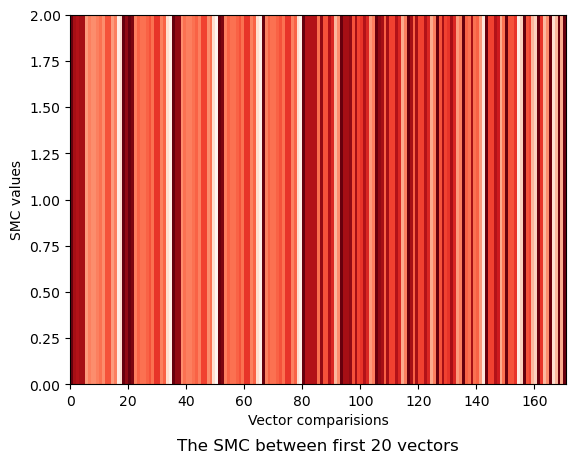

In [18]:
plt.pcolormesh([smc_values]*2, cmap='Reds')
plt.title("The SMC between first 20 vectors", y = -0.2)
plt.xlabel("Vector comparisions")
plt.ylabel("SMC values")
plt.show()

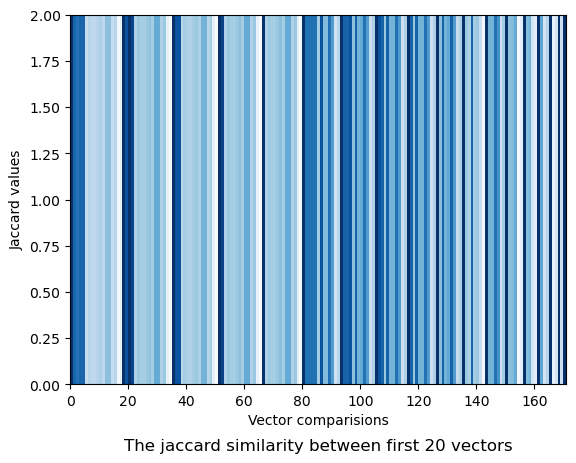

In [19]:
plt.pcolormesh([jaccard_values]*2, cmap='Blues')
plt.title("The jaccard similarity between first 20 vectors", y = -0.2)
plt.xlabel("Vector comparisions")
plt.ylabel("Jaccard values")
plt.show()

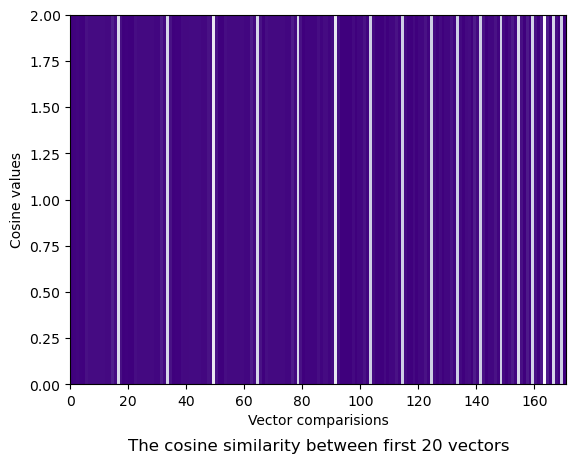

In [20]:
plt.pcolormesh([cosine_values]*2, cmap='Purples')
plt.title("The cosine similarity between first 20 vectors", y = -0.2)
plt.xlabel("Vector comparisions")
plt.ylabel("Cosine values")
plt.show()